In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

In [58]:
np.random.seed(1)
x, y = make_classification(n_samples=100,
                           n_features=2,
                           n_redundant=0,
                           n_informative=1,
                           n_clusters_per_class=1)

Data Plot

Dimension x: (100, 2)


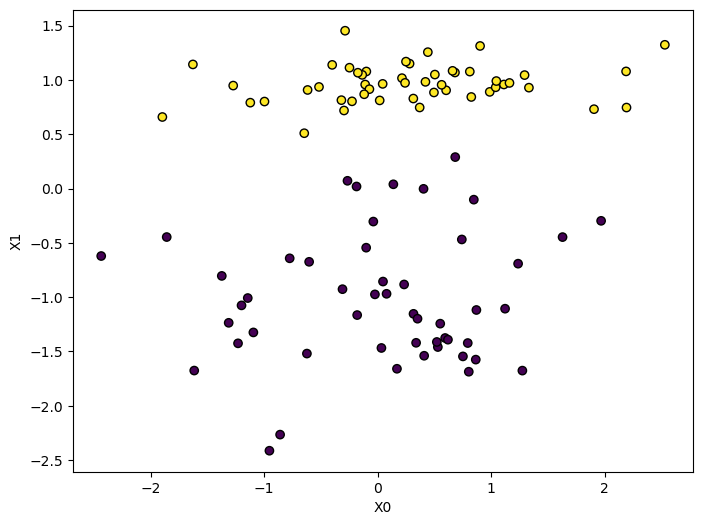

In [59]:
plt.figure(num=None, figsize=(8,6))
plt.scatter(x[:,0],x[:,1], marker='o', c=y, edgecolors='k')
plt.xlabel('X0')
plt.ylabel('X1')
print(f'Dimension x: '+str(x.shape))
plt.show()

In [60]:
#fit avec fonction cout en log pour transformer la fonction cout en convexe
model = SGDClassifier(max_iter=1000, eta0=0.001, loss='log_loss')

model.fit(x,y)
print('score:',model.score(x,y))

score: 1.0


In [61]:
#plot de la frontière du modèle
h= .02
x_min, x_max = x[:,0].min() -1, x[:,0].max()+1
y_min, y_max = x[:,1].min() -1, x[:,1].max() +1
# arange: return evenly spaced value in the interval (start, stop, step)
#meshgrid : return coordinate matrices from coordinate vectors
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
#c_ Translates slice objects to concatenation along the second axis.
#ravel : Return a contiguous flattened array.
Z= model.predict(np.c_[xx.ravel(), yy.ravel()])
##Z= meme taille que xx
Z= Z.reshape(xx.shape)

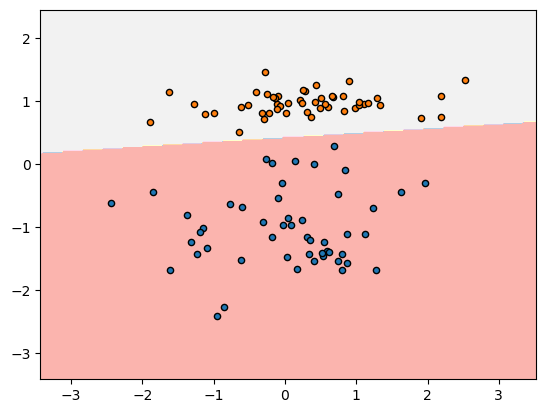

In [62]:
#method to create filled contour plots : contourf
cs=plt.contourf(xx, yy,Z, cmap=plt.cm.Pastel1, zorder=1)
plt.axis('tight')
for i in zip(model.classes_):
    idx = np.where(y==i)
    plt.scatter(x[idx,0],x[idx,1], edgecolors='black', s=20, zorder= 5)